In [104]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.optimize import curve_fit

In [105]:
Tc = 2/np.log(1+np.sqrt(2))
def reduce(t):
    return (t-Tc)/Tc

def bothsideslog(x, a1, a2, tc):
    return np.piecewise(
        x,
        [x<tc, x>tc],
        [lambda t: a1*np.log(np.abs((t-tc)/tc)), lambda t : a2*np.log(np.abs((t-tc)/tc))]
    )

def positive_side(x, a, tc):
    return  a*np.log((x-tc)/tc)

def negative_side(x, a, tc):
    return  a*np.log(-(x-tc)/tc)

$C_V$

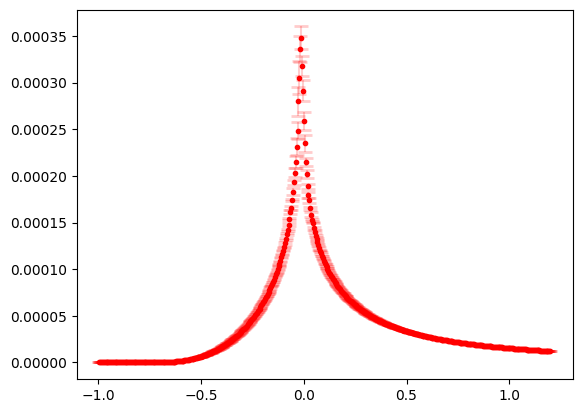

In [9]:
data_list = []
datapath = "./data/90"
for folder in Path(datapath).iterdir():
    for csv in folder.iterdir():
        if 'EM' in csv.name:
            df=pd.read_csv(csv,header=2,index_col=0)
            df=df[['E_std']]
            df=df.groupby(level=0).agg(list)["E_std"].apply(pd.Series)
            df=df.rename({'E_std':csv.name.replace('.csv','').split('_v')[1]},axis=1)
            data_list.append(df)

data_df=pd.concat(data_list, axis=1)

mean=data_df.mean(axis=1)**2/temp**2
std=data_df.std(axis=1)*2*data_df.mean(axis = 1)/temp**2
temp = data_df.index


plt.errorbar(reduce(temp),mean,yerr=std,marker='.',color='r',linestyle='none',capsize = 5, capthick = 2, alpha = .2)
plt.plot(reduce(temp),mean,marker='.',color='r',linestyle='none')
#plt.plot(reduce(data_df.index), mean,'-r', marker = ".", linestyle = "None")
plt.show()

/tmp/ipykernel_144516/2990912043.py:13: RuntimeWarning: invalid value encountered in log
  return  a*np.log((x-tc)/tc)


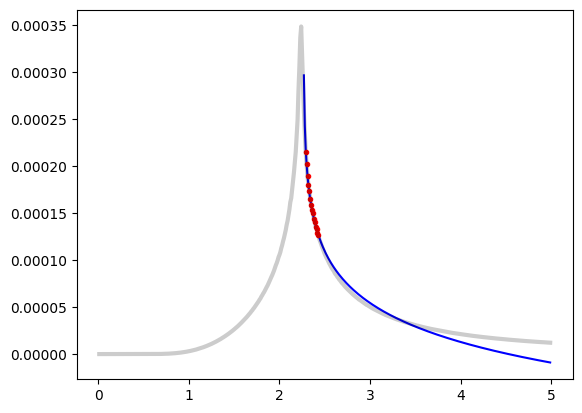

In [10]:
temps = mean.keys()
vals = [x for _,x in sorted(zip(temps, mean.values))]
errs = [x for _,x in sorted(zip(temps, std.values))]
temps = list(sorted(temps))
tc_idx = np.argmax(vals)

minidx = 5
maxidx = 20
fitslice = slice(tc_idx + minidx, tc_idx + maxidx)

popt_pos, pcov_pos = curve_fit(positive_side, temps[fitslice], vals[fitslice], p0 = [1e-4, 2.2], sigma=errs[fitslice])

plt.plot(temps, positive_side(temps, *popt_pos), "b")
plt.plot(temps[fitslice], vals[fitslice], ".r")
plt.plot(temps, vals, "k", linewidth = 3, alpha = .2)

/tmp/ipykernel_144516/2990912043.py:16: RuntimeWarning: invalid value encountered in log
  return  a*np.log(-(x-tc)/tc)


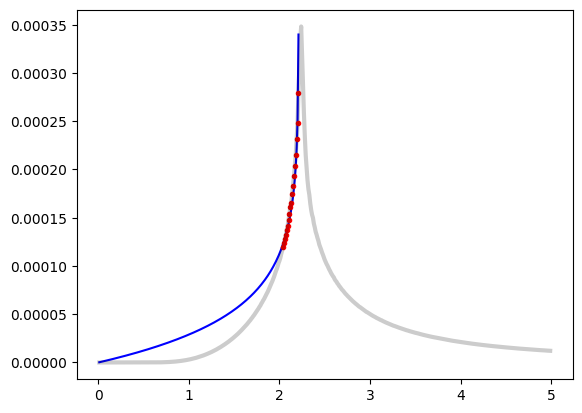

In [11]:
maxidx = 20
minidx = 2
fitslice = slice(tc_idx - maxidx, tc_idx - minidx)

popt_neg, pcov_neg = curve_fit(negative_side, temps[fitslice], vals[fitslice], p0 = [-5e-5, 2.4], sigma=errs[fitslice])

plt.plot(temps, negative_side(temps, *popt_neg), "b")
plt.plot(temps[fitslice], vals[fitslice], ".r")
plt.plot(temps, vals, "k", linewidth = 3, alpha = .2)

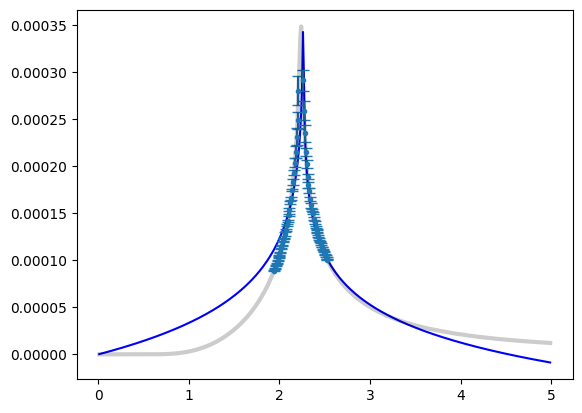

In [12]:
temps = mean.keys()
vals = [x for _,x in sorted(zip(temps, mean.values))]
temps = list(sorted(temps))
tc_idx = np.argmax(vals)

minidx = 2
maxidx = 30

def fit_range(data):
    return data[tc_idx - maxidx: tc_idx - minidx] + data[tc_idx + minidx: tc_idx + maxidx]

popt, pcov = curve_fit(bothsideslog, fit_range(temps),fit_range(vals), p0 = [popt_pos[0], popt_neg[0], popt_pos[1]])

plt.plot(temps, bothsideslog(temps, *popt), "b")
plt.errorbar(fit_range(temps), fit_range(vals), yerr = fit_range(errs), linestyle = "None", capsize = 4, marker = ".")
plt.plot(temps, vals, "k", linewidth = 3, alpha = .2)

In [14]:
popt[2]

2.2658328884565364

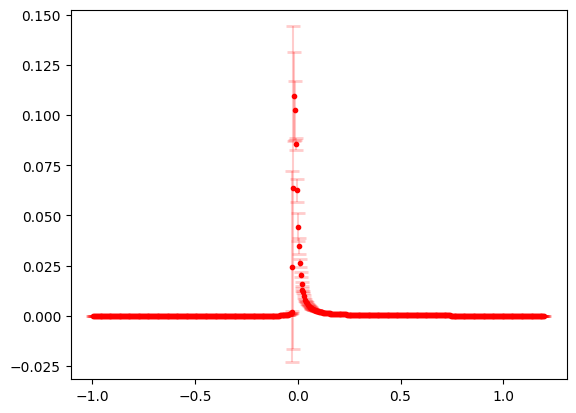

In [197]:
data_list = []
datapath = "./data/90"
for folder in Path(datapath).iterdir():
    for csv in folder.iterdir():
        if 'EM' in csv.name:
            df=pd.read_csv(csv,header=2,index_col=0)
            df=df[['M_std']]
            df=df.groupby(level=0).agg(list)["M_std"].apply(pd.Series)
            df=df.rename({'M_std':csv.name.replace('.csv','').split('_v')[1]},axis=1)
            data_list.append(df)

data_df=pd.concat(data_list, axis=1)

temp = data_df.index
mean=data_df.mean(axis=1)**2/temp
std=data_df.std(axis=1)*2*data_df.mean(axis = 1)/temp


plt.errorbar(reduce(temp),mean,yerr=std,marker='.',color='r',linestyle='none',capsize = 5, capthick = 2, alpha = .2)
plt.plot(reduce(temp),mean,marker='.',color='r',linestyle='none')
#plt.plot(reduce(data_df.index), mean,'-r', marker = ".", linestyle = "None")
plt.show()

In [198]:
temps = mean.keys()
vals = [x for _,x in sorted(zip(temps, mean.values))]
temps = list(sorted(temps))
errs = [x for _,x in sorted(zip(temps, std.values))]

In [110]:
def positive_side(x, a, b, tc):
    return a*((x-tc)/tc)**(-b)

In [220]:
region = slice(228, 250)
popt, pcov = curve_fit(positive_side, temps[region], vals[region], p0 = [.00003, 7/4, 2.23], sigma = errs[region], absolute_sigma=True)

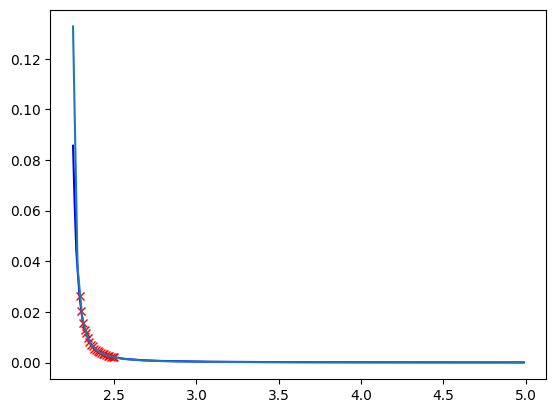

In [225]:
plt.plot(temps[224:], vals[224:], "b")
plt.plot(temps[region], vals[region], "xr")
xax = np.linspace(min(temps[224:]), max(temps[224:]), 100)
plt.plot(xax, positive_side(xax, *popt))

In [222]:
popt

array([4.98986584e-05, 1.78704765e+00, 2.22306025e+00])